<a href="https://colab.research.google.com/github/EmanoelSantosDados/PremierLigue23-24/blob/main/PremierLigue23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Essa análise consiste em verificar o melhor mandante e o melhor visitante, melhor ataque e melhor defesa**

In [57]:
# Importando as bibliotecas

#Pandas: Possui inúmeras funções e comandos para importar arquivos, análisar dados, tratar dados e mais.
import pandas as pd

#Numpy: Funções e comandos para computação científica(formatação, cálculos e mais).
import numpy as np

#Warnings: Funções e comandos para ignorar avisos que aparecem, como atualizações e métodos depreciados.
import warnings
warnings.filterwarnings('ignore')

**Análise exploratória dos dados**

In [58]:
#Exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
#Carregando e armazenando o arquivo como DataFrame
df = pd.read_csv('/content/premieLigue23.24.csv')

**Dados**

Sem nome : 0: Uma coluna de índice ou identificador.

Data : A data em que a partida ocorreu.

Hora : O horário de início da partida.

Comp : O nome da competição, que é a Premier League para as linhas exibidas.

Rodada : A rodada ou rodada da competição.

Dia : O dia da semana em que a partida foi disputada.

Local : indica se o time estava jogando em casa ou fora.

Resultado : O resultado da partida da perspectiva da equipe mencionada no final (V = Vitória, D = Empate, D = Derrota).

GF (Golos A favor) : O número de gols marcados pelo time.

GA (Gols Contra) : O número de gols sofridos pelo time.

Adversário : O nome do time adversário.

xG : Gols esperados para a equipe.

xGA : Gols esperados contra o time.

Poss : Porcentagem de posse de bola durante a partida.

Público : Número de espectadores presentes no local.

Capitão : O nome do capitão do time.

Formação : A formação do time.

Árbitro : Nome do árbitro da partida.

Relatório da partida : Um link ou referência a um relatório detalhado da partida.

Observações : Quaisquer observações adicionais sobre a partida.

Sh (Chutes) : Número total de chutes feitos pela equipe.

SoT (Chutes no Alvo) : Número de chutes no alvo.

Dist : Distância média (provavelmente em metros) da qual as fotos foram tiradas.

FK : Número de faltas cobradas.

PK (Pênaltis) : Número de pênaltis marcados.

PKatt (Pênaltis tentados) : Número de pênaltis tentados.

Estação : A estação do ano.

Equipe : A equipe sobre a qual a linha de dados se refere.

In [60]:
#Verificando a quantidade de linhas e colunas
df.shape

(760, 28)

In [61]:
#Verificando as linhas iniciais
df.head(3)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59.0,53419.0,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity


In [62]:
##Verificando as linhas finais
df.tail(3)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
757,38,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,2.2,1.5,54.0,28516.0,Jack Robinson,3-5-2,Chris Kavanagh,Match Report,NaN,16.0,4.0,18.0,0.0,1,1,2024,SheffieldUnited
758,39,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,0.6,2.3,42.0,39221.0,Jack Robinson,3-5-2,Stuart Attwell,Match Report,NaN,13.0,1.0,21.0,0.0,0,0,2024,SheffieldUnited
759,40,2024-05-19,16:00,Premier League,Matchweek 38,Sun,Home,L,0,3,Tottenham,1.0,3.1,25.0,29116.0,Jack Robinson,5-3-2,Andy Madley,Match Report,NaN,6.0,1.0,18.0,1.0,0,0,2024,SheffieldUnited


In [63]:
#Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    760 non-null    int64  
 1   Date          760 non-null    object 
 2   Time          760 non-null    object 
 3   Comp          760 non-null    object 
 4   Round         760 non-null    object 
 5   Day           760 non-null    object 
 6   Venue         760 non-null    object 
 7   Result        760 non-null    object 
 8   GF            760 non-null    int64  
 9   GA            760 non-null    int64  
 10  Opponent      760 non-null    object 
 11  xG            760 non-null    float64
 12  xGA           760 non-null    float64
 13  Poss          760 non-null    float64
 14  Attendance    760 non-null    float64
 15  Captain       760 non-null    object 
 16  Formation     760 non-null    object 
 17  Referee       760 non-null    object 
 18  Match Report  760 non-null    

In [64]:
#Verificando se alguma variável possui nulos(missing)
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
Time,0
Comp,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0


In [65]:
#Verificando se há valores discrepantes
df.groupby(['Result']).size()

,0
Result,
D,164
L,298
W,298


**Preparação dos dados para análise**

In [66]:
#Português
df.columns = ['Unnamed', 'Data', 'Hora', 'Torneio', 'Rodada', 'Dia', 'Local',
              'Resultado', 'Gol_Feito', 'Gol_Sofr', 'Adversário', 'Prob_Gols_Mand',
              'Prob_Gols_Visit', 'Posse_Bol', 'Público', 'Capitão', 'Formação',
              'Árbitro', 'Relatório_Partida', 'Observações', 'Chutes',
              'Chutes_Gol', 'Dist_Média', 'Faltas_Cobradas', 'Pênaltis',
              'Pênaltis_Tentados', 'Temporada', 'Equipe'

]

df_lin = {'Mon': 'Segunda',
               'Tue': 'Terça',
               'Wed': 'Quarta',
               'Thu': 'Quinta',
               'Fri': 'Sexta',
               'Sat': 'Sábado',
               'Sun': 'Domingo',
               'W': 'Vitória',
               'D': 'Empate',
               'L': 'Derrota',
               'Home': 'Mandante',
               'Away': 'Visitante',
}

df = df.replace(df_lin)
df.head(3)

,Unnamed,Data,Hora,Torneio,Rodada,Dia,Local,Resultado,Gol_Feito,Gol_Sofr,Adversário,Prob_Gols_Mand,Prob_Gols_Visit,Posse_Bol,Público,Capitão,Formação,Árbitro,Relatório_Partida,Observações,Chutes,Chutes_Gol,Dist_Média,Faltas_Cobradas,Pênaltis,Pênaltis_Tentados,Temporada,Equipe
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Sexta,Visitante,Vitória,3,0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sábado,Mandante,Vitória,1,0,Newcastle Utd,1.0,0.3,59.0,53419.0,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Domingo,Visitante,Vitória,2,1,Sheffield Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity


In [67]:
#Selecionando as colunas importantes para análise
columns = ['Data', 'Rodada', 'Dia', 'Local', 'Resultado',
           'Gol_Feito', 'Gol_Sofr', 'Adversário', 'Posse_Bol',
           'Formação', 'Pênaltis', 'Temporada', 'Equipe']

df = df[columns]

In [68]:
#Criando a coluna Placar
df['Placar'] = df['Gol_Feito'].astype(str) + '-' + df['Gol_Sofr'].astype(str)

#Ordenando colunas
df = df[['Rodada', 'Data', 'Dia', 'Local', 'Equipe', 'Placar', 'Adversário', 'Resultado', 'Gol_Feito', 'Gol_Sofr', 'Posse_Bol', 'Formação', 'Pênaltis', 'Temporada']]

In [69]:
#Deixando somente o número
df['Rodada'] = df['Rodada'].str.replace('Matchweek', '')

In [70]:
#Avaliando o período dos dados coletados
inicio = pd.to_datetime(df['Data']).dt.date.min()       #Início da temporada
fim = pd.to_datetime(df['Data']).dt.date.max()          #Final da temporada
print('Início: {} / Final: {}'.format(inicio, fim))     #Exibe o período dos dados

Início: 2023-08-11 / Final: 2024-05-19


In [71]:
df.head(3)

,Rodada,Data,Dia,Local,Equipe,Placar,Adversário,Resultado,Gol_Feito,Gol_Sofr,Posse_Bol,Formação,Pênaltis,Temporada
0,1,2023-08-11,Sexta,Visitante,ManchesterCity,3-0,Burnley,Vitória,3,0,65.0,4-2-3-1,0,2024
1,2,2023-08-19,Sábado,Mandante,ManchesterCity,1-0,Newcastle Utd,Vitória,1,0,59.0,4-2-3-1,0,2024
2,3,2023-08-27,Domingo,Visitante,ManchesterCity,2-1,Sheffield Utd,Vitória,2,1,79.0,4-2-3-1,0,2024


**Números do campeonato**

In [95]:
#Total de vitorias
total_vitoria = df.groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Vitória').sum()).sort_values(ascending=False)
total_derrota = df.groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Derrota').sum()).sort_values(ascending=False)

In [96]:
vitoria_mandante = df[df['Local'] == 'Mandante'].groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Vitória').sum()).sort_values(ascending=False)
empate_mandante = df[df['Local'] == 'Mandante'].groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Empate').sum()).sort_values(ascending=False)
derrota_mandante = df[df['Local'] == 'Mandante'].groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Derrota').sum()).sort_values(ascending=False)

vitoria_visitante = df[df['Local'] == 'Visitante'].groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Vitória').sum()).sort_values(ascending=False)
empate_visitante = df[df['Local'] == 'Visitante'].groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Empate').sum()).sort_values(ascending=False)
derrota_visitante = df[df['Local'] == 'Visitante'].groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Derrota').sum()).sort_values(ascending=False)

empate_total = df.groupby('Equipe')['Resultado'].apply(lambda x: (x == 'Empate').sum()).sort_values(ascending=False)

melhor_ataque = df.groupby('Equipe')['Gol_Feito'].apply(lambda x: x.sum()).sort_values(ascending=False)
melhor_defesa = df.groupby('Equipe')['Gol_Sofr'].apply(lambda x: x.sum()).sort_values(ascending=True)

In [99]:
#Exibindo os resultados
print(f'Total de jogos: {df.shape[0]}')
print(f'Total de gols marcados: {df["Gol_Feito"].sum()}')
print(f'Total de vitórias / derrotas: {total_vitoria.sum()}')
print(f'Total de empates: {empate_mandante.sum() + empate_visitante.sum()}')
print(f'Média de gols por jogo: {df["Gol_Feito"].mean()}')
print('='*60)
print('='*60)

print(f'time com mais vitorias: {total_vitoria.index[0]} {total_vitoria[0]}')
print(f'time com mais empates: {empate_total.index[0]} {empate_total[0]}')
print(f'time com mais derrotas: {derrota_mandante.index[0]} {total_derrota[0]}')
print('='*60)
print('='*60)

print(f'Melhor mandante: {vitoria_mandante.index[0]} {vitoria_mandante[0]} vitórias')
print(f'Melhor visitante: {vitoria_visitante.index[0]} {vitoria_visitante[0]} vitórias')
print(f'Time com mais empates em casa: {empate_mandante.index[0]} {empate_mandante[0]} empates')
print(f'Time com mais empates fora: {empate_visitante.index[0]} {empate_visitante[0]} empates')
print('='*60)
print('='*60)

print(f'Melhor ataque: {melhor_ataque.index[0]} {melhor_ataque[0]} gols marcados')
print(f'Melhor defesa: {melhor_defesa.index[0]} {melhor_defesa[0]} gols marcados')
print(f'Time com melhor média de posse de bola por jogo: {df.groupby("Equipe")["Posse_Bol"].mean().idxmax()} {df.groupby("Equipe")["Posse_Bol"].mean().max()}')
print('='*60)
print('='*60)

Total de jogos: 760
Total de gols marcados: 1246
Total de vitórias / derrotas: 298
Total de empates: 164
Média de gols por jogo: 1.6394736842105264
time com mais vitorias: Arsenal 28
time com mais empates: BrightonandHoveAlbion 12
time com mais derrotas: SheffieldUnited 28
Melhor mandante: Arsenal 15 vitórias
Melhor visitante: ManchesterCity 14 vitórias
Time com mais empates em casa: WestHamUnited 8 empates
Time com mais empates fora: Liverpool 7 empates
Melhor ataque: ManchesterCity 96 gols marcados
Melhor defesa: Arsenal 29 gols marcados
Time com melhor média de posse de bola por jogo: ManchesterCity 65.21052631578948


**Gerando os gráficos da análise**

In [100]:
#Matplotlib: Funções e comandos para exibição de gráficos.
import matplotlib.pyplot as plt

#Seaborn: Funções e comandos para exibição de gráficos(Mais robusto que o Matplotlib).
import seaborn as sns

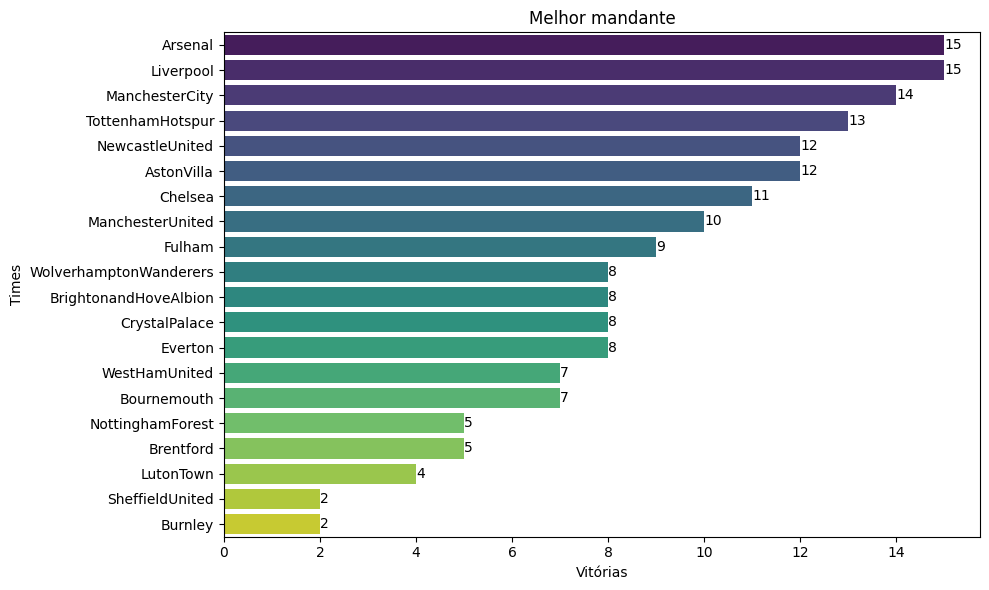

In [125]:
#Melhor mandante
plt.rcParams['figure.figsize'] = [10.00, 6.00]
plt.rcParams['figure.autolayout'] = True

sns.barplot(x=vitoria_mandante.values, y=vitoria_mandante.index, palette='viridis')

#Total de vitorias
for i in range(len(vitoria_mandante.values)):
    plt.text(vitoria_mandante.values[i], i, vitoria_mandante.values[i], ha='left', va='center')

plt.title('Melhor mandante')
plt.xlabel('Vitórias')
plt.ylabel('Times')

plt.show()

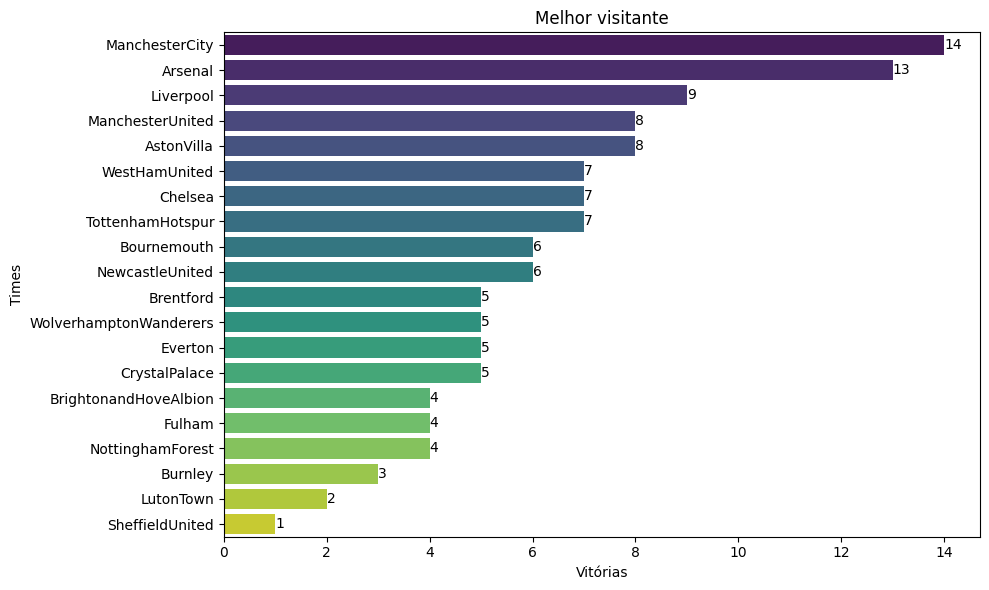

In [126]:
#Melhor visitante
plt.rcParams['figure.figsize'] = [10.00, 6.00]
plt.rcParams['figure.autolayout'] = True

sns.barplot(x=vitoria_visitante.values, y=vitoria_visitante.index, palette='viridis')

#Total de vitorias
for i in range(len(vitoria_visitante.values)):
    plt.text(vitoria_visitante.values[i], i, vitoria_visitante.values[i], ha='left', va='center')

plt.title('Melhor visitante')
plt.xlabel('Vitórias')
plt.ylabel('Times')

plt.show()

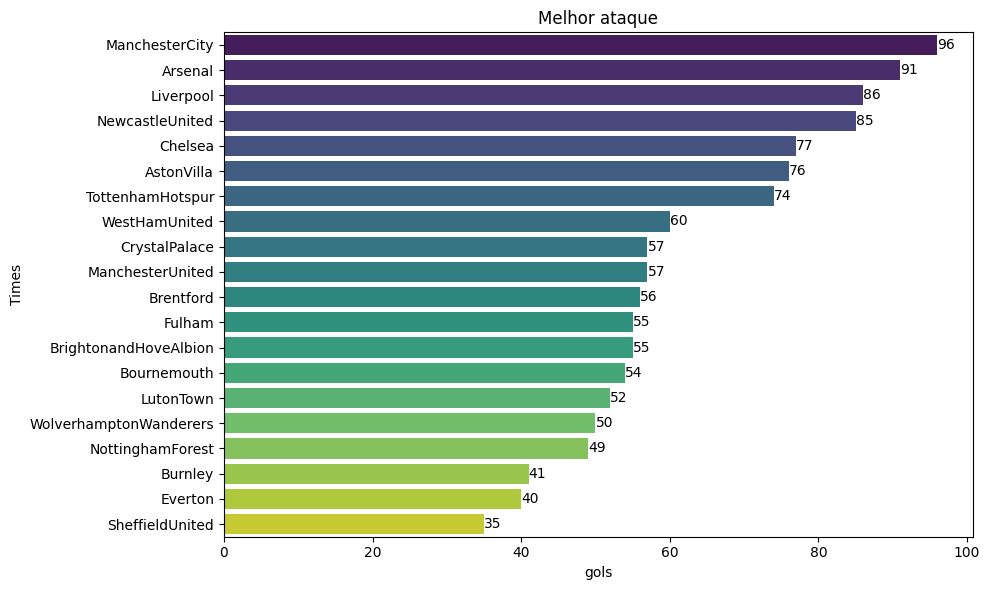

In [127]:
#Melhor ataque
plt.rcParams['figure.figsize'] = [10.00, 6.00]
plt.rcParams['figure.autolayout'] = True

sns.barplot(x=melhor_ataque.values, y=melhor_ataque.index, palette='viridis')

#Total de gols
for i in range(len(melhor_ataque.values)):
    plt.text(melhor_ataque.values[i], i, melhor_ataque.values[i], ha='left', va='center')

plt.title('Melhor ataque')
plt.xlabel('gols')
plt.ylabel('Times')

plt.show()

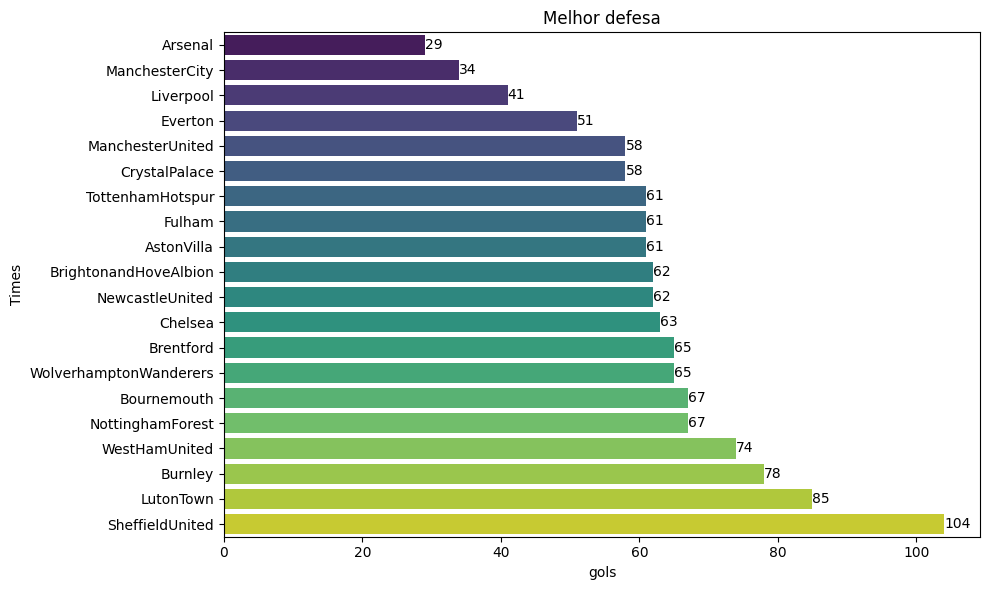

In [128]:
#Melhor defesa
plt.rcParams['figure.figsize'] = [10.00, 6.00]
plt.rcParams['figure.autolayout'] = True

sns.barplot(x=melhor_defesa.values, y=melhor_defesa.index, palette='viridis')

#Total de gols
for i in range(len(melhor_defesa.values)):
    plt.text(melhor_defesa.values[i], i, melhor_defesa.values[i], ha='left', va='center')

plt.title('Melhor defesa')
plt.xlabel('gols')
plt.ylabel('Times')

plt.show()

In [130]:
#Salvando em excel
df.to_excel('premieLigue23.24.xlsx', index=False)

#Fazer download do arquivo
from google.colab import files
files.download('premieLigue23.24.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>